# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\12188\OneDrive - Cornell University\BEE 4750\homework\hw2-ashton-pihl`


In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

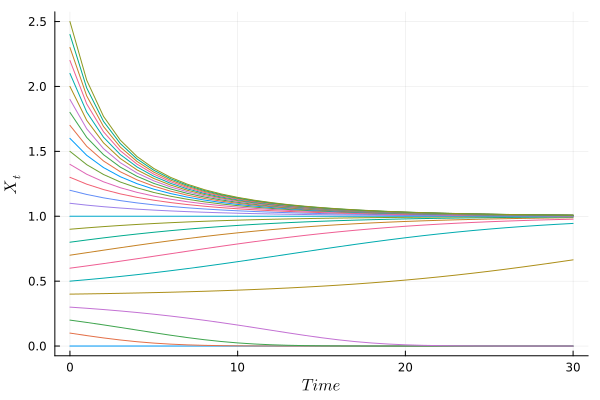

an equilibrium is: 1.0, an equilibrium is: 0.38, an equilibrium is: 0.0

In [5]:
# initialize variables
b = 0.5 
q = 1.5 
y = 0 
a = 0 
T = 30 #last time tested
tstepsize = 1 
xstepsize = 0.1 
XX = 2.5 #last intital phosphorus concentration to be tested
X = zeros(Int(XX/xstepsize + 1),Int(T/tstepsize + 1))
X[:,1] = 0:xstepsize:XX
# programming shallow lake model:
for i in 2:size(X,2)
    for j in 1:size(X,1)
        X[j,i] = X[j,i-1] + a + y +(X[j,i-1]^q / (1 + X[j,i-1]^q)) - b*X[j,i-1]
    end
end
dyn = plot(0:tstepsize:T,X[1,:],legend=false,xlabel=L"Time",ylabel=L"X_t")
for i in 2:size(X,1)
    dyn = plot!(0:30,X[i,:])
end
display(dyn)

# finding equilibria
X_delta(x,b,q,y,a) = a + y + (x^q / (1 + x^q)) - b*x
xos = [1.1 0.4 0]
eq = zeros(1,3)
for i in 1:3
    xo = xos[1,i] #equilibria search starts based on dynamics graph
    eq[1,i] = Roots.find_zero(x -> X_delta(x,b,q,y,a), xo)
end
print("an equilibrium is: ",round(eq[1],digits=2),", ")
print("an equilibrium is: ",round(eq[2],digits=2),", ")
print("an equilibrium is: ",round(eq[3],digits=2))

There are stable equilibria at a phosphorus concentration of 1.0 and 0.0, and an unstable equilibrium at a phosphorus concentration of 0.38. If the phosphorus concentration is greater than 1.0, the system will resiliently rebound to a concentration of 1.0 without intervention. However, if the phosphorus concentration is greater than 0.38, the system will naturally increase the phosphorus concentration to 1.0 via nutrient cycling. Unless the system has a phosphorus concentration of exactly 0.38 and is undisturbed, the system will eventually lose all phosphorus.

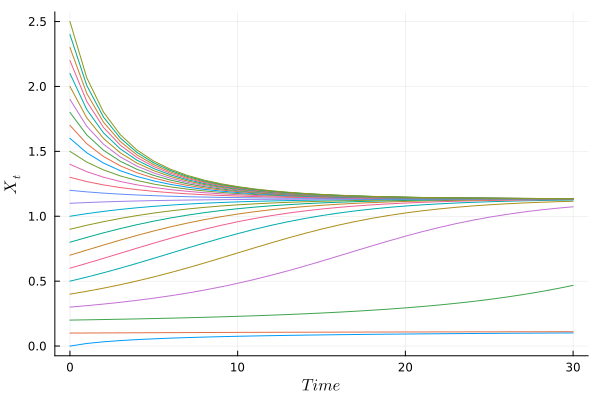

an equilibrium is: 1.13, an equilibrium is: 0.15, an equilibrium is: 0.12

In [4]:
# initialize variables
b = 0.5 
q = 1.5 
y = 0 
a = 0.02
T = 30 #last time tested
tstepsize = 1 
xstepsize = 0.1 
XX = 2.5 #last initial phosphorus concentration to be tested
X = zeros(Int(XX/xstepsize + 1),Int(T/tstepsize + 1))
X[:,1] = 0:xstepsize:XX
# programming shallow lake model:
for i in 2:size(X,2)
    for j in 1:size(X,1)
        X[j,i] = X[j,i-1] + a + y +(X[j,i-1]^q / (1 + X[j,i-1]^q)) - b*X[j,i-1]
    end
end
dyn = plot(0:tstepsize:T,X[1,:],legend=false,xlabel=L"Time",ylabel=L"X_t")
for i in 2:size(X,1)
    dyn = plot!(0:30,X[i,:])
end
display(dyn)

# finding equilibria
X_delta(x,b,q,y,a) = a + y + (x^q / (1 + x^q)) - b*x
xos = [1.1 0.2 0] #equilibria search starts based on dynamics graph
eq = zeros(1,3)
for i in 1:3
    xo = xos[1,i]
    eq[1,i] = Roots.find_zero(x -> X_delta(x,b,q,y,a), xo)
end
print("an equilibrium is: ",round(eq[1],digits=2),", ")
print("an equilibrium is: ",round(eq[2],digits=2),", ")
print("an equilibrium is: ",round(eq[3],digits=2),)

There are stable equilibria at a phosphorus concentration of 1.13 and 0.12, and an unstable equilibrium at a phosphorus concentration of 0.15. With the addition of a point source phosphorus release, the number of equilibria and their pattern (stable/unstable/stable) has not changed, but their value has. The system is still resilient to large disturbances, returning the phosphorus concentration to a lower (but now slightly larger) baseline concentration. However, the system now naturally increases the phosphorus concentration to the largest equilibrium value over a larger range of initial concentrations as the largest equilibrium value has increased and the unstable equilibrium value has decreased. The system also no longer tends to a phosphorus concentration of zero below the unstable equilibrium value as the lower stable equilibrium value has increased to 0.12.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.